In [8]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.patches import PathPatch

In [9]:
# JSON 데이터 로드
with open("/home/alpaco/jeju/user/nsm/B_ratio/_annotations.coco_v3.json", "r") as json_file:
    data = json.load(json_file)

In [10]:
data

{'info': {'year': '2024',
  'version': '2',
  'description': 'Exported from roboflow.com',
  'contributor': '',
  'url': 'https://public.roboflow.com/object-detection/undefined',
  'date_created': '2024-01-18T02:23:50+00:00'},
 'licenses': [{'id': 1,
   'url': 'https://creativecommons.org/licenses/by/4.0/',
   'name': 'CC BY 4.0'}],
 'categories': [{'id': 0, 'name': 'map-7gGg', 'supercategory': 'none'},
  {'id': 1, 'name': 'anduck', 'supercategory': 'map-7gGg'},
  {'id': 2, 'name': 'ara', 'supercategory': 'map-7gGg'},
  {'id': 3, 'name': 'bonggae', 'supercategory': 'map-7gGg'},
  {'id': 4, 'name': 'cheonji', 'supercategory': 'map-7gGg'},
  {'id': 5, 'name': 'chuja', 'supercategory': 'map-7gGg'},
  {'id': 6, 'name': 'daecheon', 'supercategory': 'map-7gGg'},
  {'id': 7, 'name': 'daejung', 'supercategory': 'map-7gGg'},
  {'id': 8, 'name': 'daerun', 'supercategory': 'map-7gGg'},
  {'id': 9, 'name': 'dodu', 'supercategory': 'map-7gGg'},
  {'id': 10, 'name': 'donghung', 'supercategory': 'map

In [12]:
len(data["annotations"])

53

In [6]:
from PIL import Image

def get_image_dimensions(image_path):
    try:
        # 이미지 열기
        image = Image.open(image_path)

        # 이미지의 높이, 너비, 채널 얻기
        height, width = image.size
        channels = len(image.getbands())

        # 결과 출력
        print(f"이미지 높이: {height}")
        print(f"이미지 너비: {width}")
        print(f"이미지 채널: {channels}")
    
    except Exception as e:
        print(f"오류: {e}")



In [11]:
seg_img = '/home/alpaco/jeju/user/nsm/B_ratio/segmentation_v4.jpeg'

get_image_dimensions(seg_img)

이미지 높이: 4034
이미지 너비: 2475
이미지 채널: 3


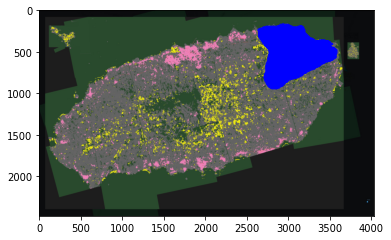

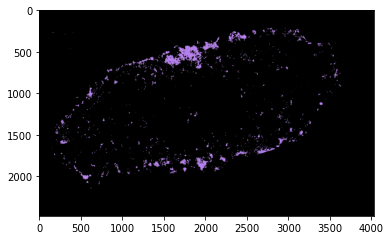

In [14]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.patches import PathPatch

# JSON 데이터 로드
with open("/home/alpaco/jeju/user/nsm/B_ratio/_annotations.coco_v3.json", "r") as json_file:
    data = json.load(json_file)

# 첫 번째 annotation의 segmentation 정보
segmentation_points = data["annotations"][0]["segmentation"][0]

# segmentation_points를 x, y 좌표로 분리
x_points = segmentation_points[0::2]
y_points = segmentation_points[1::2]

# 첫 번째 annotation의 bbox 정보
bbox = data["annotations"][0]["bbox"]

# 시각화
fig, ax = plt.subplots(1)
ax.imshow(plt.imread(data["images"][0]["file_name"]))

# segmentation을 다각형으로 표시
polygon = patches.Polygon(np.array([x_points, y_points]).T, closed=True, edgecolor='b', facecolor='none')
ax.add_patch(polygon)

# segmentation 내부를 색칠
path = polygon.get_path()
patch = PathPatch(path, facecolor='blue', lw=0)
ax.add_patch(patch)

plt.show()

import cv2
import numpy as np

# 이미지를 불러오기
image = cv2.imread('/home/alpaco/jeju/user/nsm/B_ratio/segmentation_v4.jpeg')

# RGB 색상 값 설정
target_color = (223, 121, 161)

thr = 50

# 이미지에서 특정 색상을 찾아내기
lower_bound = np.array([target_color[2] - thr, target_color[1] - thr, target_color[0] - thr])
upper_bound = np.array([target_color[2] + thr, target_color[1] + thr, target_color[0] + thr])
mask = cv2.inRange(image, lower_bound, upper_bound)

# 마스크를 이용하여 특정 색상 부분을 하얀색으로, 나머지 부분을 검은색으로 만들기
result = cv2.bitwise_and(image, image, mask=mask)

# 결과 이미지 저장
cv2.imwrite('/home/alpaco/jeju/user/nsm/B_ratio/result_mask_v4.jpg', result)

plt.imshow(result)


In [15]:
import pandas as pd


df = pd.DataFrame(data, columns=['지역', '겹치는 영역의 픽셀 수', '영역 픽셀 수', 'ratio'])
df

Empty DataFrame
Columns: [지역, 겹치는 영역의 픽셀 수, 영역 픽셀 수, ratio]
Index: []

In [16]:
len(data["annotations"])

53

In [17]:
data

{'info': {'year': '2024',
  'version': '2',
  'description': 'Exported from roboflow.com',
  'contributor': '',
  'url': 'https://public.roboflow.com/object-detection/undefined',
  'date_created': '2024-01-18T02:23:50+00:00'},
 'licenses': [{'id': 1,
   'url': 'https://creativecommons.org/licenses/by/4.0/',
   'name': 'CC BY 4.0'}],
 'categories': [{'id': 0, 'name': 'map-7gGg', 'supercategory': 'none'},
  {'id': 1, 'name': 'anduck', 'supercategory': 'map-7gGg'},
  {'id': 2, 'name': 'ara', 'supercategory': 'map-7gGg'},
  {'id': 3, 'name': 'bonggae', 'supercategory': 'map-7gGg'},
  {'id': 4, 'name': 'cheonji', 'supercategory': 'map-7gGg'},
  {'id': 5, 'name': 'chuja', 'supercategory': 'map-7gGg'},
  {'id': 6, 'name': 'daecheon', 'supercategory': 'map-7gGg'},
  {'id': 7, 'name': 'daejung', 'supercategory': 'map-7gGg'},
  {'id': 8, 'name': 'daerun', 'supercategory': 'map-7gGg'},
  {'id': 9, 'name': 'dodu', 'supercategory': 'map-7gGg'},
  {'id': 10, 'name': 'donghung', 'supercategory': 'map

In [18]:
import json

# JSON 파일을 엽니다.
with open('/home/alpaco/jeju/user/nsm/B_ratio/_annotations.coco_v3.json', 'r') as file:
    data = json.load(file)

# 'categories' 섹션에서 ID와 이름을 매핑하여 딕셔너리를 생성합니다.
name_dic = {category['id']: category['name'] for category in data['categories']}

# 결과를 출력합니다.
print(name_dic)
print(len(name_dic))


{0: 'map-7gGg', 1: 'anduck', 2: 'ara', 3: 'bonggae', 4: 'cheonji', 5: 'chuja', 6: 'daecheon', 7: 'daejung', 8: 'daerun', 9: 'dodu', 10: 'donghung', 11: 'ewol', 12: 'guja', 13: 'gunip', 14: 'hangyung', 15: 'hanlim', 16: 'hwabuck', 17: 'hyodon', 18: 'ido11', 19: 'ido2', 20: 'iho', 21: 'ildo11', 22: 'ildo2', 23: 'jocheon', 24: 'jungang', 25: 'jungbang', 26: 'jungmun', 27: 'namwon', 28: 'nohyung', 29: 'ora', 30: 'pyosun', 31: 'samdo1', 32: 'samdo2', 33: 'samyang', 34: 'seohung', 35: 'songsan', 36: 'sungsan', 37: 'udo', 38: 'weodo', 39: 'yeahyeah', 40: 'yeon', 41: 'yongdam2', 42: 'youngcheon', 43: 'youngdam1'}
44


map-7gGg 중첩 영역의 픽셀 수: 97078
지역 픽셀 수: 1356567.0
비율: 7.16%
0번째 지역


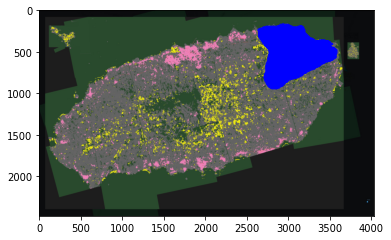

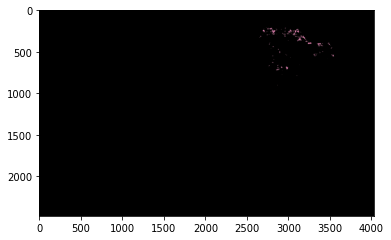

anduck 중첩 영역의 픽셀 수: 102602
지역 픽셀 수: 1078137.0
비율: 9.52%
1번째 지역


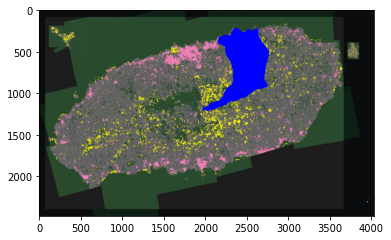

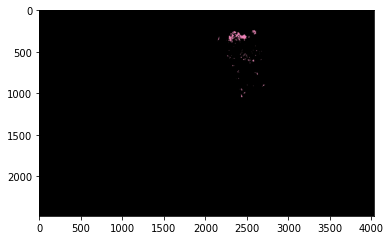

ara 중첩 영역의 픽셀 수: 66450
지역 픽셀 수: 662529.0
비율: 10.03%
2번째 지역


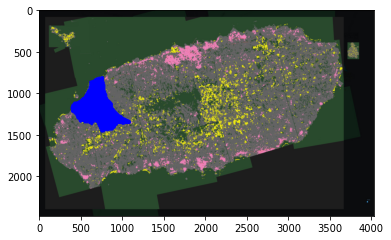

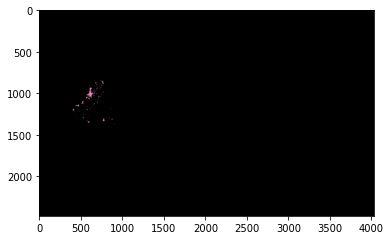

bonggae 중첩 영역의 픽셀 수: 72620
지역 픽셀 수: 559125.0
비율: 12.99%
3번째 지역


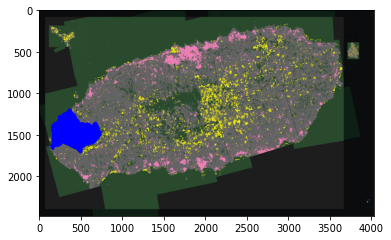

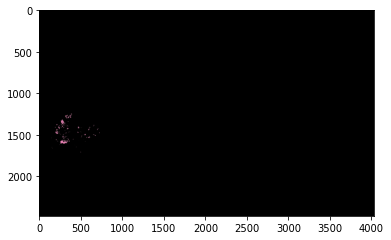

cheonji 중첩 영역의 픽셀 수: 53046
지역 픽셀 수: 549426.0
비율: 9.65%
4번째 지역


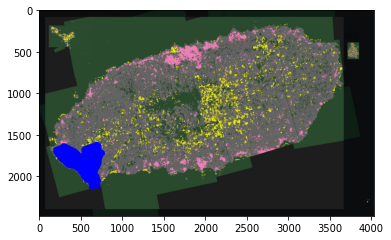

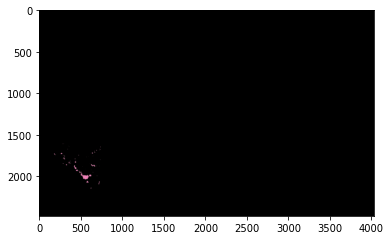

chuja 중첩 영역의 픽셀 수: 46806
지역 픽셀 수: 741471.0
비율: 6.31%
5번째 지역


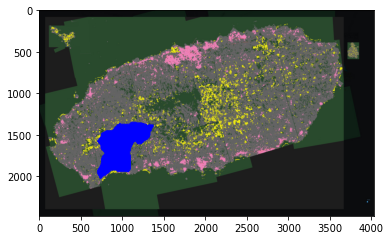

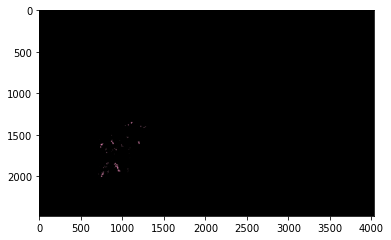

daecheon 중첩 영역의 픽셀 수: 134909
지역 픽셀 수: 1340817.0
비율: 10.06%
6번째 지역


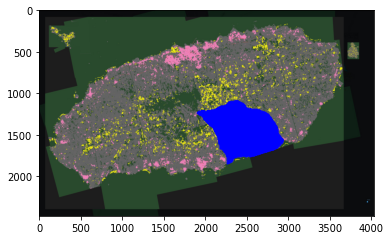

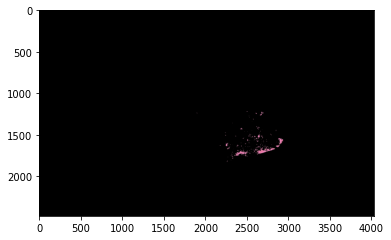

daejung 중첩 영역의 픽셀 수: 76552
지역 픽셀 수: 956304.0
비율: 8.0%
7번째 지역


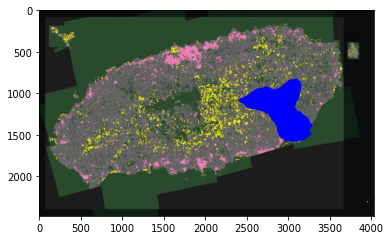

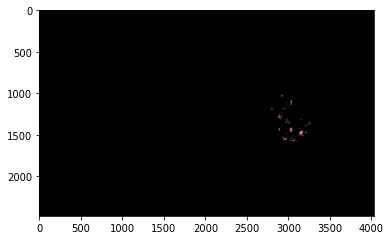

daerun 중첩 영역의 픽셀 수: 45741
지역 픽셀 수: 788340.0
비율: 5.8%
8번째 지역


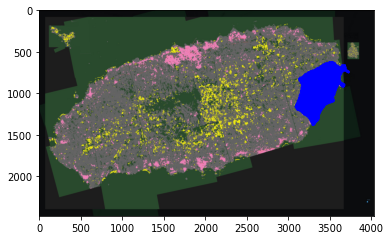

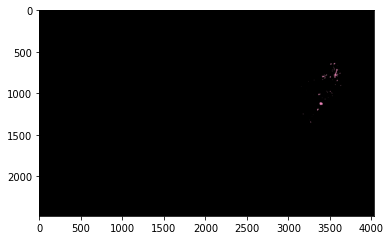

dodu 중첩 영역의 픽셀 수: 124784
지역 픽셀 수: 1453041.0
비율: 8.59%
9번째 지역


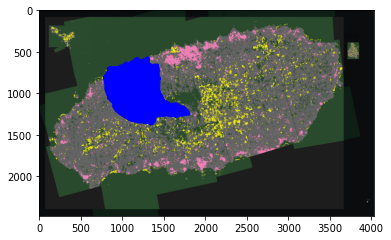

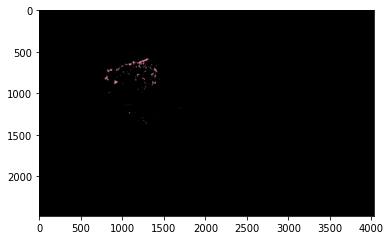

donghung 중첩 영역의 픽셀 수: 24338
지역 픽셀 수: 276144.0
비율: 8.81%
10번째 지역


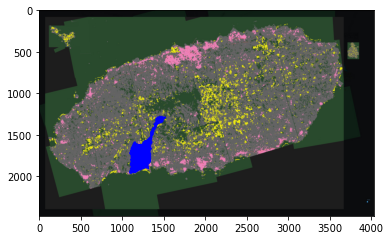

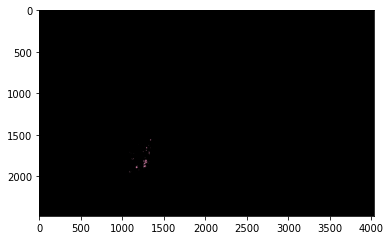

ewol 중첩 영역의 픽셀 수: 52153
지역 픽셀 수: 446328.0
비율: 11.68%
11번째 지역


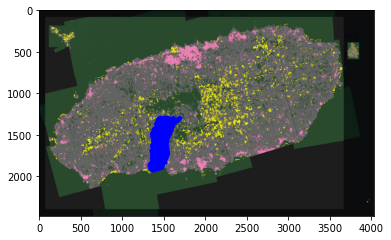

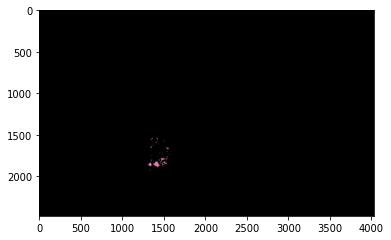

guja 중첩 영역의 픽셀 수: 35949
지역 픽셀 수: 358797.0
비율: 10.02%
12번째 지역


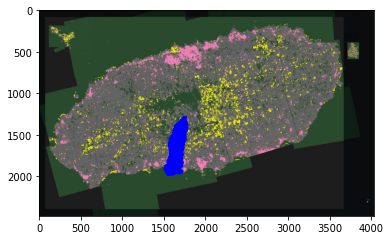

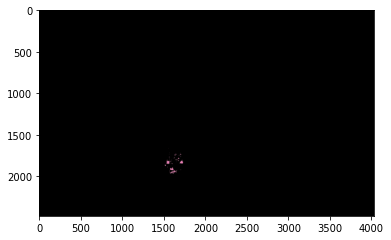

gunip 중첩 영역의 픽셀 수: 27173
지역 픽셀 수: 326979.0
비율: 8.31%
13번째 지역


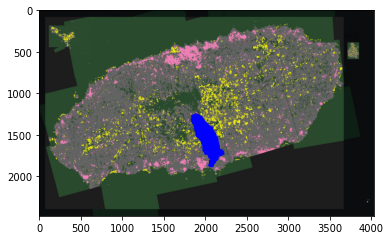

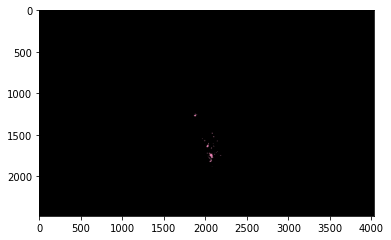

hangyung 중첩 영역의 픽셀 수: 13898
지역 픽셀 수: 45567.0
비율: 30.5%
14번째 지역


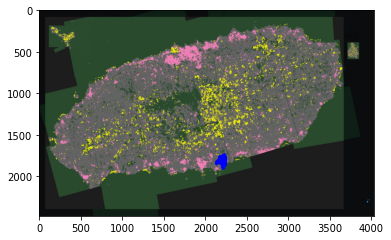

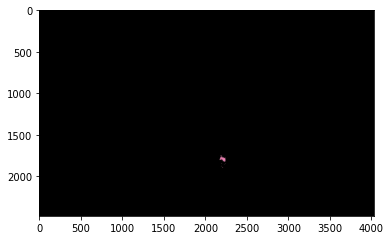

hanlim 중첩 영역의 픽셀 수: 8713
지역 픽셀 수: 31053.0
비율: 28.06%
15번째 지역


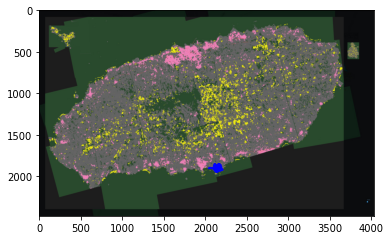

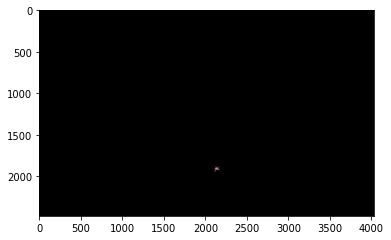

hwabuck 중첩 영역의 픽셀 수: 29299
지역 픽셀 수: 161139.0
비율: 18.18%
16번째 지역


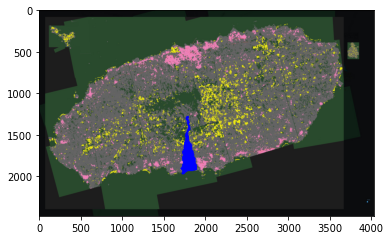

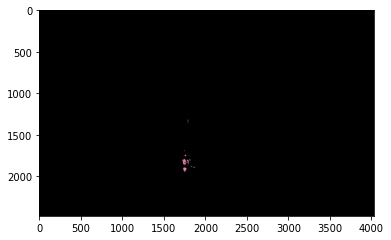

hyodon 중첩 영역의 픽셀 수: 22615
지역 픽셀 수: 95919.0
비율: 23.58%
17번째 지역


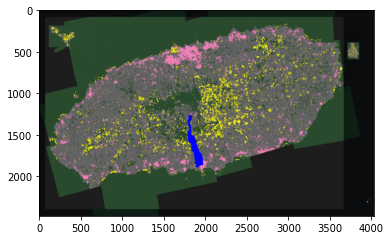

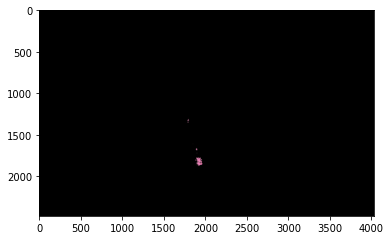

ido11 중첩 영역의 픽셀 수: 6807
지역 픽셀 수: 12996.0
비율: 52.38%
18번째 지역


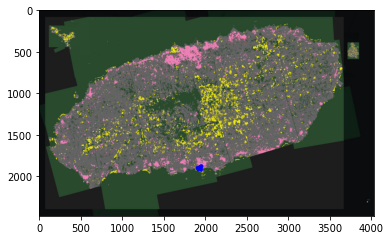

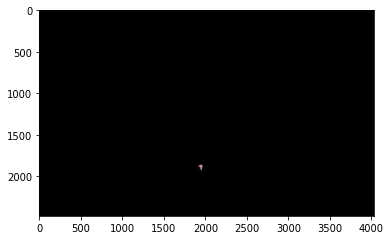

ido2 중첩 영역의 픽셀 수: 1803
지역 픽셀 수: 4017.0
비율: 44.88%
19번째 지역


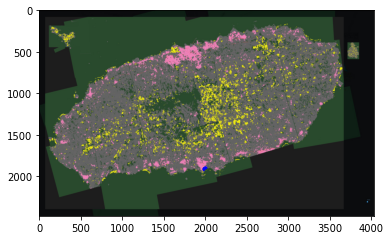

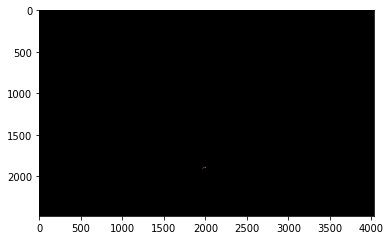

iho 중첩 영역의 픽셀 수: 2315
지역 픽셀 수: 2505.0
비율: 92.42%
20번째 지역


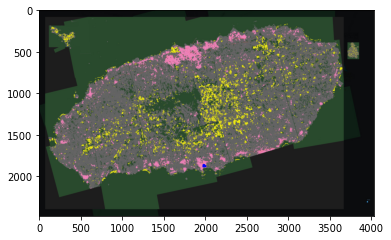

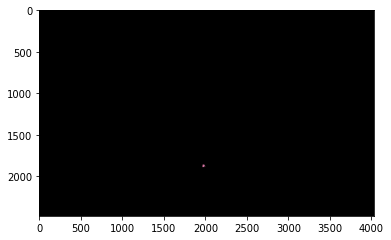

ildo11 중첩 영역의 픽셀 수: 17443
지역 픽셀 수: 103473.0
비율: 16.86%
21번째 지역


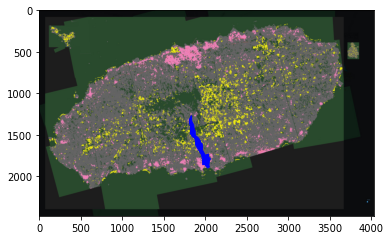

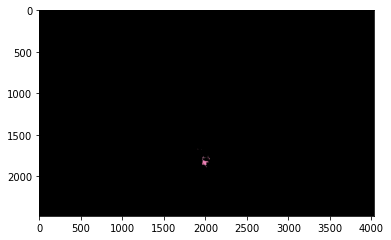

ildo2 중첩 영역의 픽셀 수: 17567
지역 픽셀 수: 63876.0
비율: 27.5%
22번째 지역


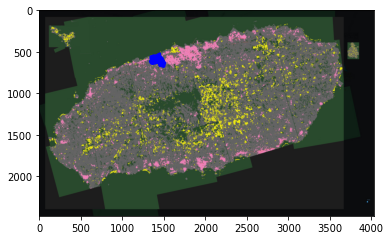

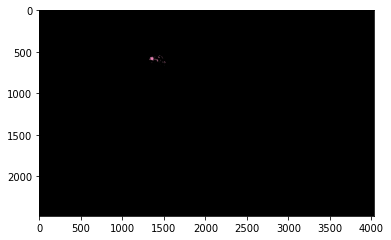

jocheon 중첩 영역의 픽셀 수: 8760
지역 픽셀 수: 19515.0
비율: 44.89%
23번째 지역


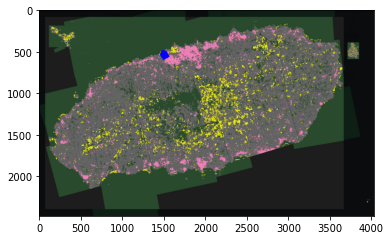

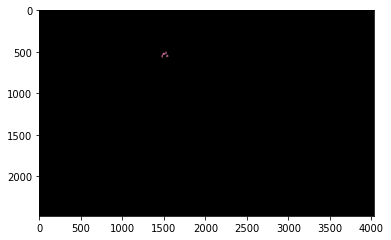

jungang 중첩 영역의 픽셀 수: 5908
지역 픽셀 수: 28332.0
비율: 20.85%
24번째 지역


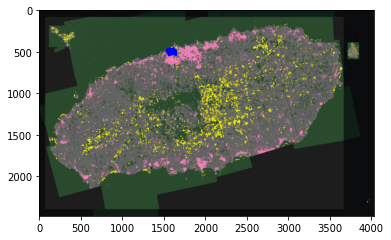

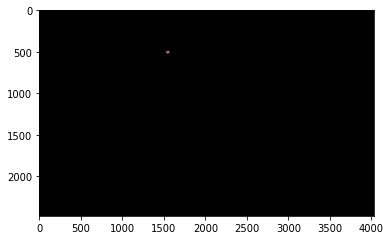

jungbang 중첩 영역의 픽셀 수: 15109
지역 픽셀 수: 36783.0
비율: 41.08%
25번째 지역


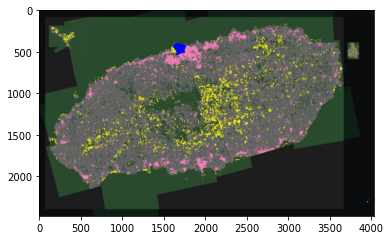

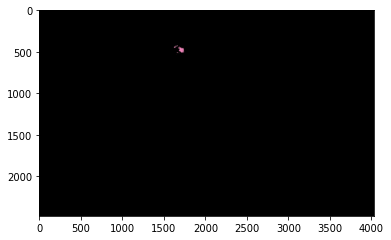

jungmun 중첩 영역의 픽셀 수: 53298
지역 픽셀 수: 328212.0
비율: 16.24%
26번째 지역


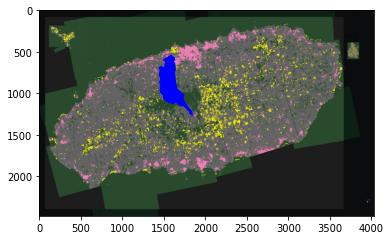

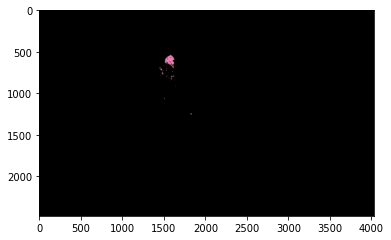

namwon 중첩 영역의 픽셀 수: 25161
지역 픽셀 수: 90825.0
비율: 27.7%
27번째 지역


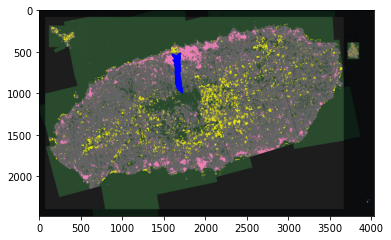

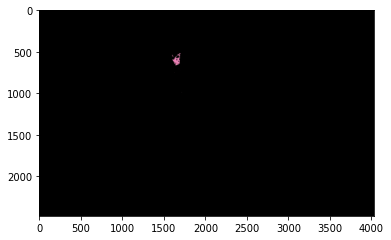

nohyung 중첩 영역의 픽셀 수: 28138
지역 픽셀 수: 205074.0
비율: 13.72%
28번째 지역


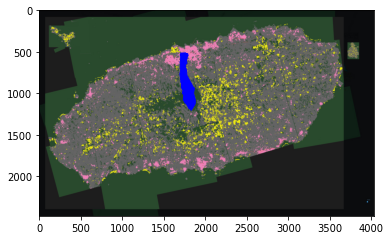

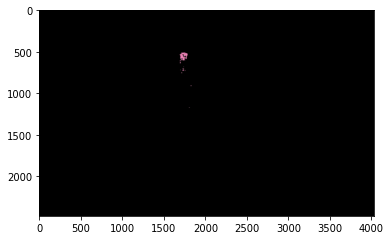

ora 중첩 영역의 픽셀 수: 50250
지역 픽셀 수: 514215.0
비율: 9.77%
29번째 지역


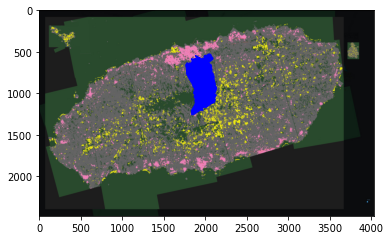

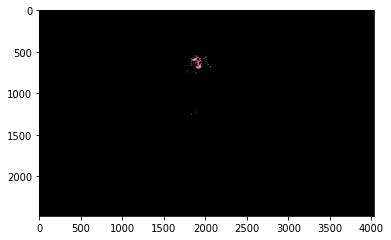

pyosun 중첩 영역의 픽셀 수: 23031
지역 픽셀 수: 342663.0
비율: 6.72%
30번째 지역


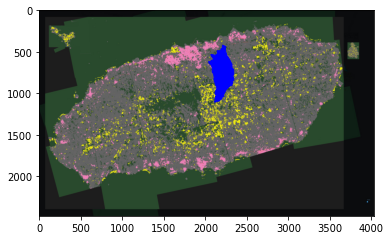

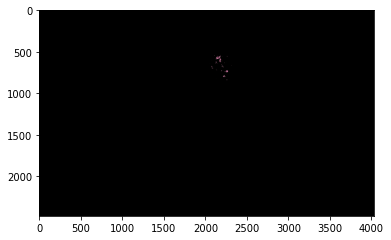

samdo1 중첩 영역의 픽셀 수: 29676
지역 픽셀 수: 74463.0
비율: 39.85%
31번째 지역


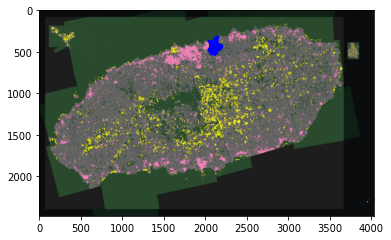

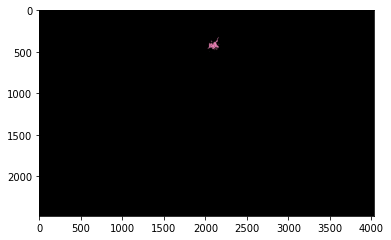

samdo2 중첩 영역의 픽셀 수: 31292
지역 픽셀 수: 61908.0
비율: 50.55%
32번째 지역


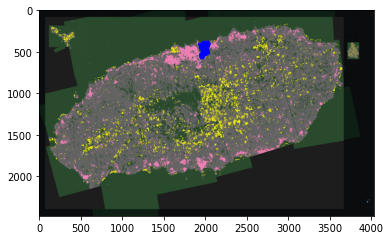

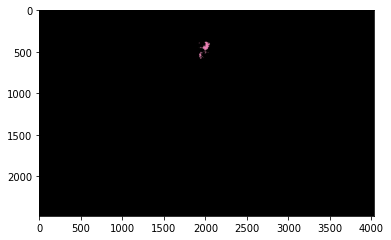

samyang 중첩 영역의 픽셀 수: 32473
지역 픽셀 수: 41112.0
비율: 78.99%
33번째 지역


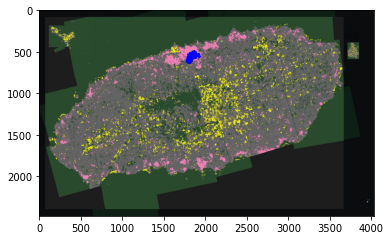

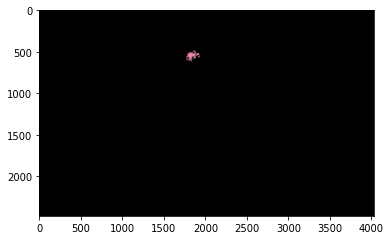

seohung 중첩 영역의 픽셀 수: 3901
지역 픽셀 수: 4845.0
비율: 80.52%
34번째 지역


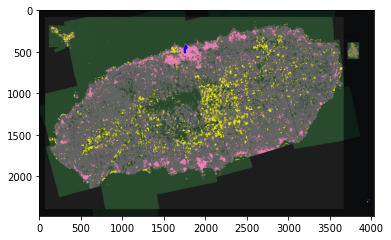

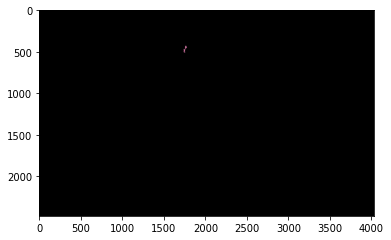

songsan 중첩 영역의 픽셀 수: 6485
지역 픽셀 수: 6528.0
비율: 99.34%
35번째 지역


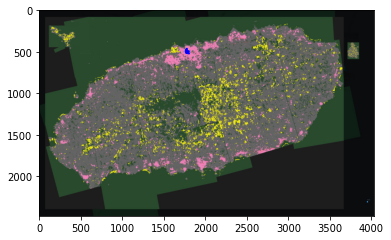

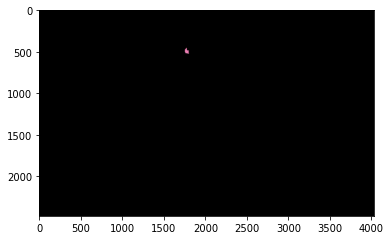

sungsan 중첩 영역의 픽셀 수: 4406
지역 픽셀 수: 6474.0
비율: 68.06%
36번째 지역


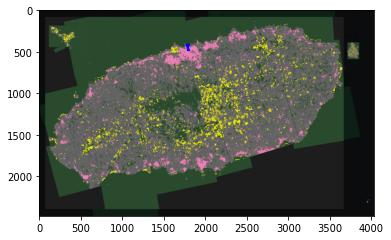

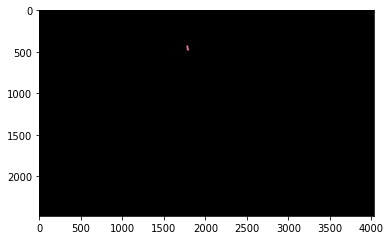

udo 중첩 영역의 픽셀 수: 16134
지역 픽셀 수: 17343.0
비율: 93.03%
37번째 지역


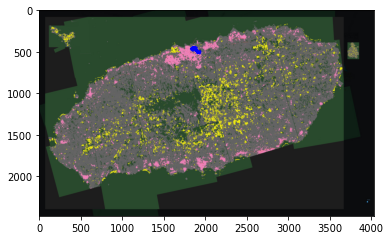

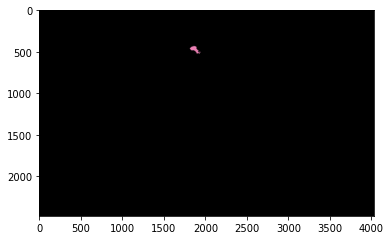

weodo 중첩 영역의 픽셀 수: 1576
지역 픽셀 수: 2355.0
비율: 66.92%
38번째 지역


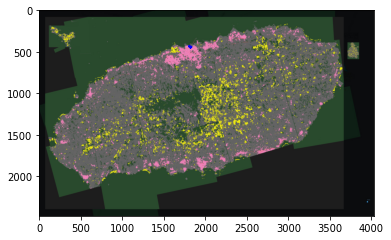

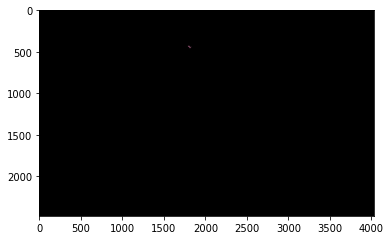

yeahyeah 중첩 영역의 픽셀 수: 6322
지역 픽셀 수: 21633.0
비율: 29.22%
39번째 지역


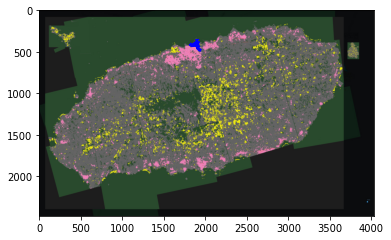

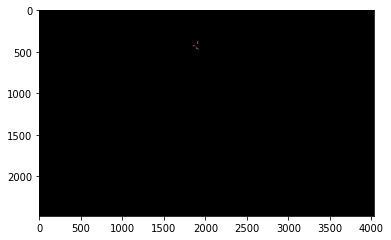

yeon 중첩 영역의 픽셀 수: 5432
지역 픽셀 수: 5676.0
비율: 95.7%
40번째 지역


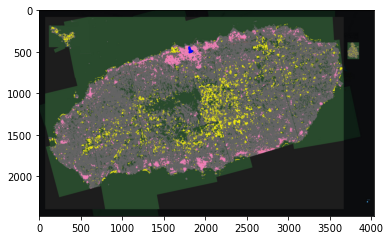

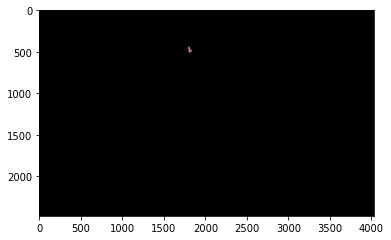

yongdam2 중첩 영역의 픽셀 수: 1143
지역 픽셀 수: 50685.0
비율: 2.26%
41번째 지역


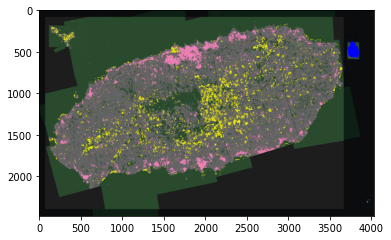

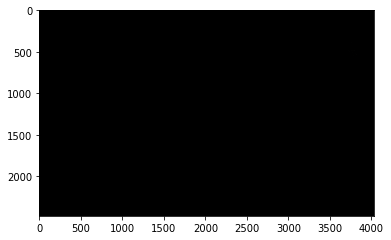

youngcheon 중첩 영역의 픽셀 수: 1434
지역 픽셀 수: 65796.0
비율: 2.18%
42번째 지역


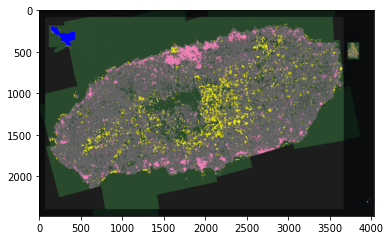

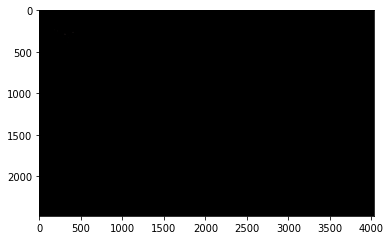

youngdam1 중첩 영역의 픽셀 수: 0
지역 픽셀 수: 4137.0
비율: 0.0%
43번째 지역


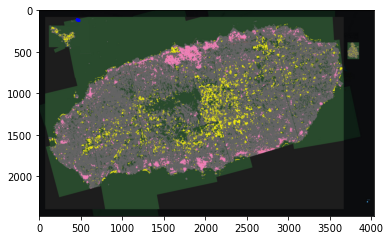

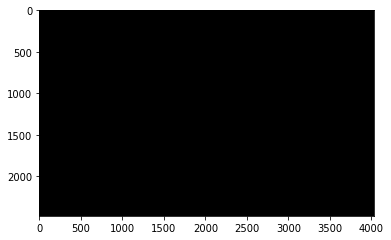

Unknown Area 44 중첩 영역의 픽셀 수: 0
지역 픽셀 수: 4293.0
비율: 0.0%
44번째 지역


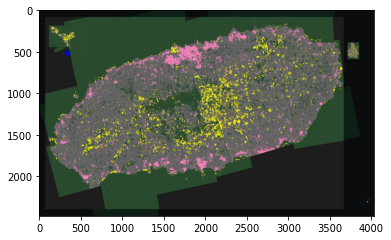

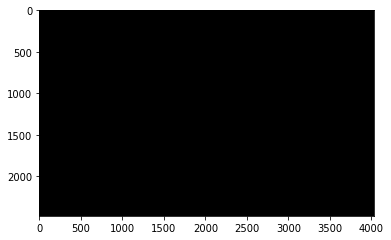

Unknown Area 45 중첩 영역의 픽셀 수: 0
지역 픽셀 수: 699.0
비율: 0.0%
45번째 지역


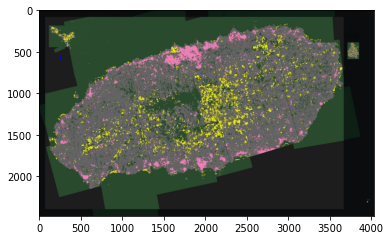

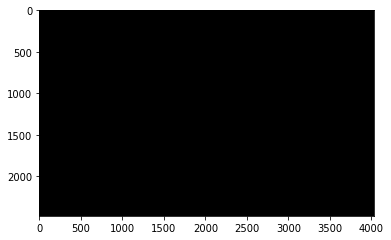

Unknown Area 46 중첩 영역의 픽셀 수: 0
지역 픽셀 수: 2103.0
비율: 0.0%
46번째 지역


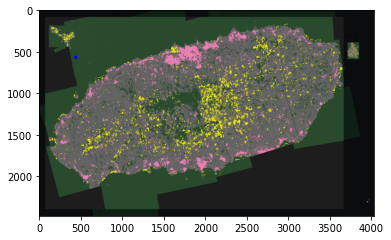

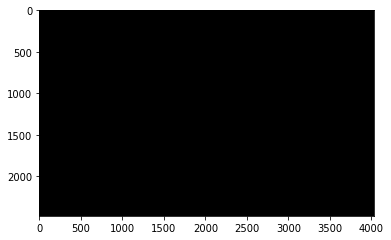

Unknown Area 47 중첩 영역의 픽셀 수: 0
지역 픽셀 수: 807.0
비율: 0.0%
47번째 지역


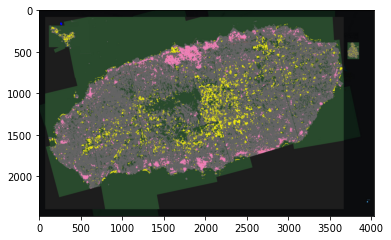

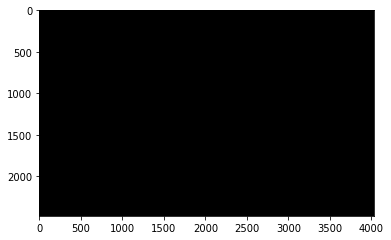

Unknown Area 48 중첩 영역의 픽셀 수: 0
지역 픽셀 수: 2874.0
비율: 0.0%
48번째 지역


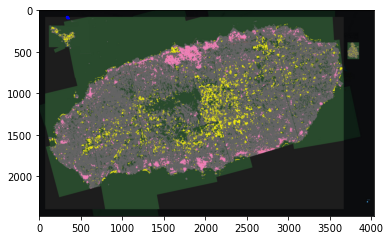

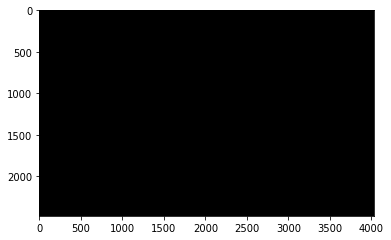

Unknown Area 49 중첩 영역의 픽셀 수: 0
지역 픽셀 수: 708.0
비율: 0.0%
49번째 지역


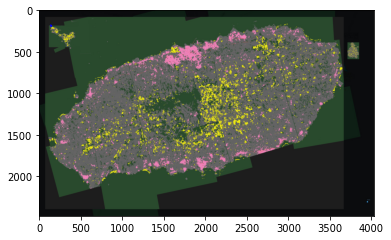

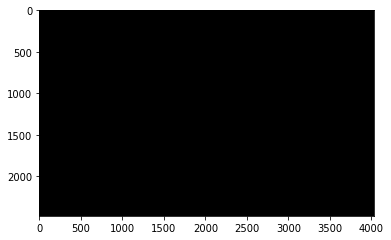

Unknown Area 50 중첩 영역의 픽셀 수: 0
지역 픽셀 수: 423.0
비율: 0.0%
50번째 지역


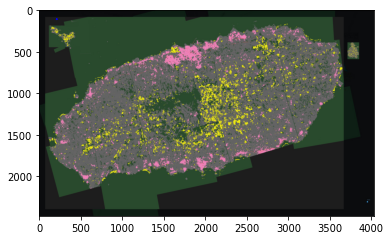

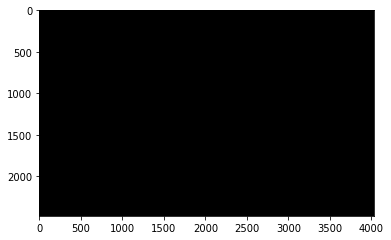

Unknown Area 51 중첩 영역의 픽셀 수: 0
지역 픽셀 수: 327.0
비율: 0.0%
51번째 지역


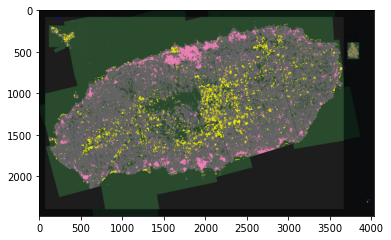

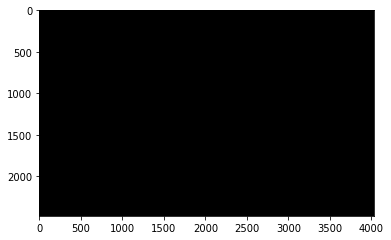

Unknown Area 52 중첩 영역의 픽셀 수: 0
지역 픽셀 수: 384.0
비율: 0.0%
52번째 지역


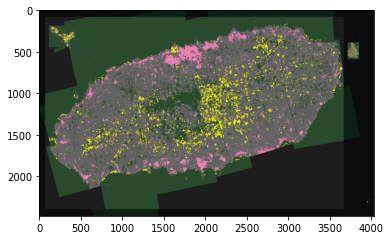

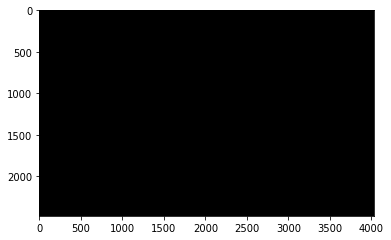

In [20]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.patches import PathPatch
import cv2
import pandas as pd


# JSON 데이터 로드
with open("/home/alpaco/jeju/user/nsm/B_ratio/_annotations.coco_v3.json", "r") as json_file:
    data = json.load(json_file)

# 아주 작은 수 epsilon 정의
epsilon = 1e-10

# 주석 반복문
for i in range(len(data["annotations"])):
    # 현재 주석의 세분화 정보
    segmentation_points = data["annotations"][i]["segmentation"][0]

    # 세분화 정보를 x, y 좌표로 분리
    x_points = segmentation_points[0::2]
    y_points = segmentation_points[1::2]

    # 현재 주석의 Bbox 정보
    bbox = data["annotations"][i]["bbox"]

    # 시각화
    fig, ax = plt.subplots(1)
    ax.imshow(plt.imread(data["images"][0]["file_name"]))

    # 다각형으로 세분화 표시
    polygon = patches.Polygon(np.array([x_points, y_points]).T, closed=True, edgecolor='b', facecolor='none')
    ax.add_patch(polygon)

    # 세분화 내부를 색칠
    path = polygon.get_path()
    patch = PathPatch(path, facecolor='blue', lw=0)
    ax.add_patch(patch)

    # OpenCV를 사용하여 이미지 로드
    image = cv2.imread('result_mask_v4.jpg')

    # 결과 이미지와 패치 간의 중첩 영역 찾기
    mask = np.zeros_like(image, dtype=np.uint8)
    cv2.fillPoly(mask, [np.array([x_points, y_points]).T.astype(int)], (255, 255, 255))
    intersection = cv2.bitwise_and(image, mask)

    # 아주 작은 수 epsilon을 분모에 더하여 0으로 나누는 것을 방지
    pixels_in_eup = np.sum(mask > 0) + epsilon

    # 중첩 영역의 픽셀 수 계산
    pixels_in_intersection = np.sum(intersection > 0)

    # 중첩 영역 시각화
    fig, ax = plt.subplots(1)
    ax.imshow(cv2.cvtColor(intersection, cv2.COLOR_BGR2RGB))

    # name_dic에서 area_id에 해당하는 키가 있는지 확인
    area_id = data["annotations"][i]['id']  # 지역 ID
    if area_id in name_dic.keys():
        area = name_dic[area_id]
    else:
        area = f"Unknown Area {area_id}"  # 없는 경우 Unknown Area로 설정

    print(f"{area} 중첩 영역의 픽셀 수: {pixels_in_intersection}")
    print(f"지역 픽셀 수: {pixels_in_eup - epsilon}")  # epsilon을 빼서 정확한 값을 출력
    ratio = round((pixels_in_intersection / (pixels_in_eup - epsilon)) * 100, 2)
    print(f"비율: {ratio}%")
    print(f'{i}번째 지역')

    plt.show()
    
    new_row = {'지역': area, '겹치는 영역의 픽셀 수': pixels_in_intersection, '영역 픽셀 수': pixels_in_eup, 'ratio': round((pixels_in_intersection/pixels_in_eup)*100,2)}
    df = df.append(new_row, ignore_index=True)

# DataFrame을 CSV 파일로 저장
df.to_csv('B_ratio_data_v4.csv', index=False)


In [ ]:
# import json
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# import numpy as np
# from matplotlib.patches import PathPatch
# import cv2
# import pandas as pd

# # 결과를 저장할 빈 DataFrame 생성
# df = pd.DataFrame(columns=['Area', 'Number of pixels in overlapping area', 'Number of pixels in area', 'Ratio'])

# # JSON 데이터 로드
# with open("/home/alpaco/jeju/user/nsm/B_ratio/_annotations.coco_v3.json", "r") as json_file:
#     data = json.load(json_file)

# # 필요한 경우 name_dic이 코드에 정의되어 있지 않은 경우 추가로 정의
# # name_dic = ...

# # 아주 작은 수 epsilon 정의
# epsilon = 1e-10

# # 주석 반복문
# for i in range(len(data["annotations"])):
#     # 현재 주석의 세분화 정보
#     segmentation_points = data["annotations"][i]["segmentation"][0]

#     # 세분화 정보를 x, y 좌표로 분리
#     x_points = segmentation_points[0::2]
#     y_points = segmentation_points[1::2]

#     # 현재 주석의 Bbox 정보
#     bbox = data["annotations"][i]["bbox"]

#     # 시각화
#     fig, ax = plt.subplots(1)
#     ax.imshow(plt.imread(data["images"][0]["file_name"]))

#     # 다각형으로 세분화 표시
#     polygon = patches.Polygon(np.array([x_points, y_points]).T, closed=True, edgecolor='b', facecolor='none')
#     ax.add_patch(polygon)

#     # 세분화 내부를 색칠
#     path = polygon.get_path()
#     patch = PathPatch(path, facecolor='blue', lw=0)
#     ax.add_patch(patch)

#     # OpenCV를 사용하여 이미지 로드
#     image = cv2.imread('result_mask_v3.jpg')

#     # 결과 이미지와 패치 간의 중첩 영역 찾기
#     mask = np.zeros_like(image, dtype=np.uint8)
#     cv2.fillPoly(mask, [np.array([x_points, y_points]).T.astype(int)], (255, 255, 255))
#     intersection = cv2.bitwise_and(image, mask)

#     # 아주 작은 수 epsilon을 분모에 더하여 0으로 나누는 것을 방지
#     pixels_in_eup = np.sum(mask > 0) + epsilon

#     # 중첩 영역의 픽셀 수 계산
#     pixels_in_intersection = np.sum(intersection > 0)

#     # 중첩 영역 시각화
#     fig, ax = plt.subplots(1)
#     ax.imshow(cv2.cvtColor(intersection, cv2.COLOR_BGR2RGB))

#     area_id = data["annotations"][i]['id']  # 지역 ID
#     area = name_dic[area_id]

#     print(f"{area} 중첩 영역의 픽셀 수: {pixels_in_intersection}")
#     print(f"지역 픽셀 수: {pixels_in_eup - epsilon}")  # epsilon을 빼서 정확한 값을 출력
#     ratio = round((pixels_in_intersection / (pixels_in_eup - epsilon)) * 100, 2)
#     print(f"비율: {ratio}%")
#     print(f'{i}번째 지역')

#     # DataFrame에서 지역이 이미 존재하는지 확인
#     if area in df['Area'].values:
#         # 기존 행 업데이트
#         df.loc[df['Area'] == area, 'Number of pixels in overlapping area'] += pixels_in_intersection
#         df.loc[df['Area'] == area, 'Number of pixels in area'] += pixels_in_eup
#         df.loc[df['Area'] == area, 'Ratio'] = round((df.loc[df['Area'] == area, 'Number of pixels in overlapping area'] /
#                                                      df.loc[df['Area'] == area, 'Number of pixels in area']) * 100, 2)
#     else:
#         # DataFrame에 새로운 행 추가
#         new_row = {'Area': area, 'Number of pixels in overlapping area': pixels_in_intersection,
#                    'Number of pixels in area': pixels_in_eup - epsilon, 'Ratio': ratio}
#         df = df.append(new_row, ignore_index=True)


#     plt.show()

# # DataFrame을 CSV 파일로 저장
# df.to_csv('B_ratio_data_v3.csv', index=False)
